## Iris flower classification -Codsoft task 3

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [34]:
iris=pd.read_csv("C:\\Users\\prasanna\\OneDrive\\Desktop\\5thsem\\datasets(codsoft)\\IRIS.csv")

In [35]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#checking for null values
iris.isnull().sum()

#no null values thus we can proceed further

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
iris.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
iris.shape

(150, 5)

In [11]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### data visualisation

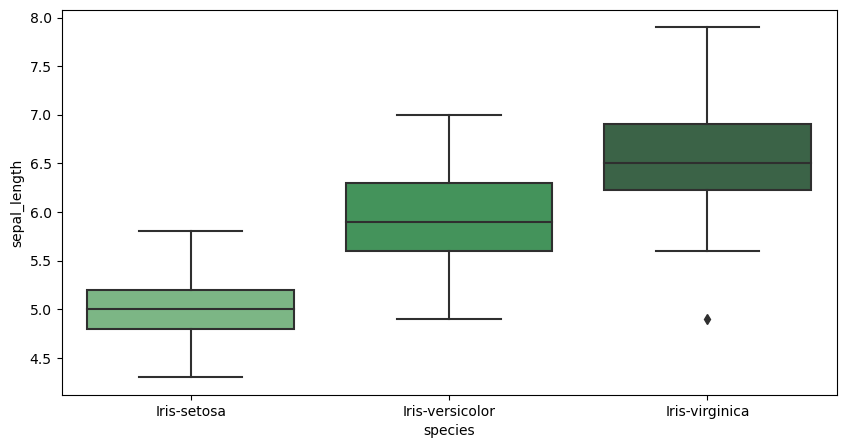

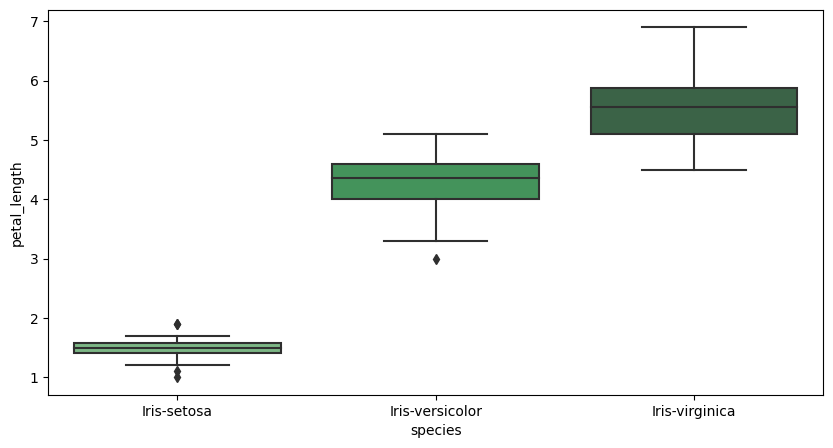

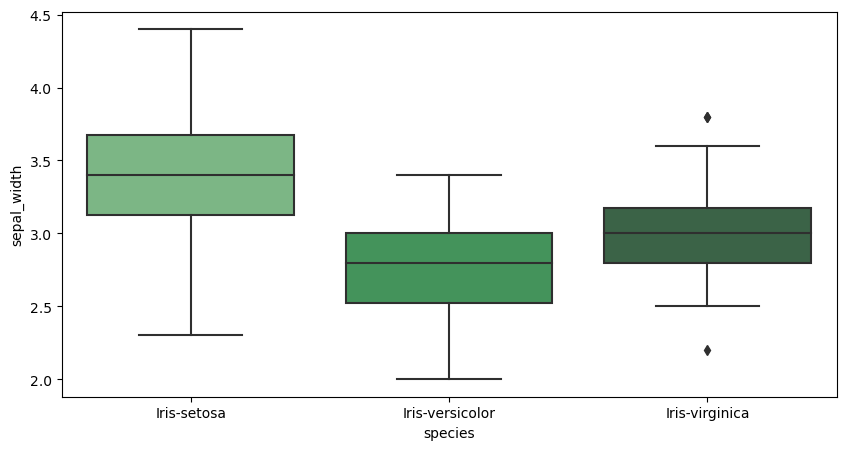

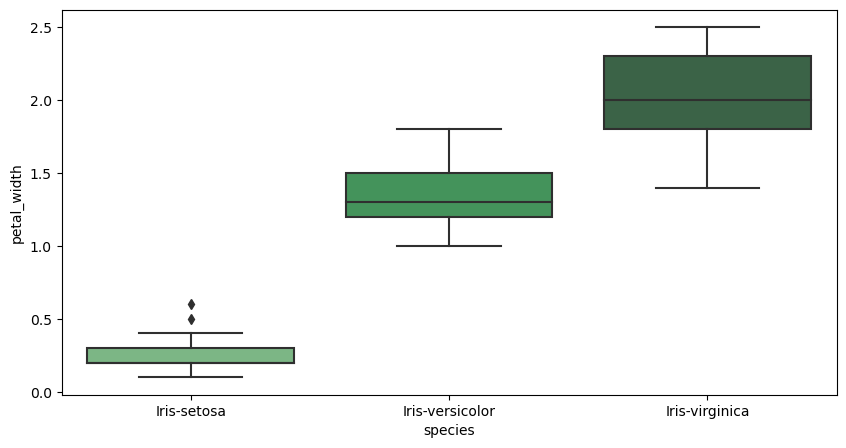

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x='species', y='sepal_length', data=iris, palette='Greens_d')
plt.show()
##there is an outlier in iris-virginica

plt.figure(figsize=(10, 5))
sns.boxplot(x='species', y='petal_length', data=iris, palette='Greens_d')
plt.show()
## there is an outlier in iris-versicolor and many in iris-setosa

plt.figure(figsize=(10, 5))
sns.boxplot(x='species', y='sepal_width', data=iris, palette='Greens_d')
plt.show()
## there are two outlier in iris-virginica

plt.figure(figsize=(10, 5))
sns.boxplot(x='species', y='petal_width', data=iris, palette='Greens_d')
plt.show()
## there is outlier in iris-setosa

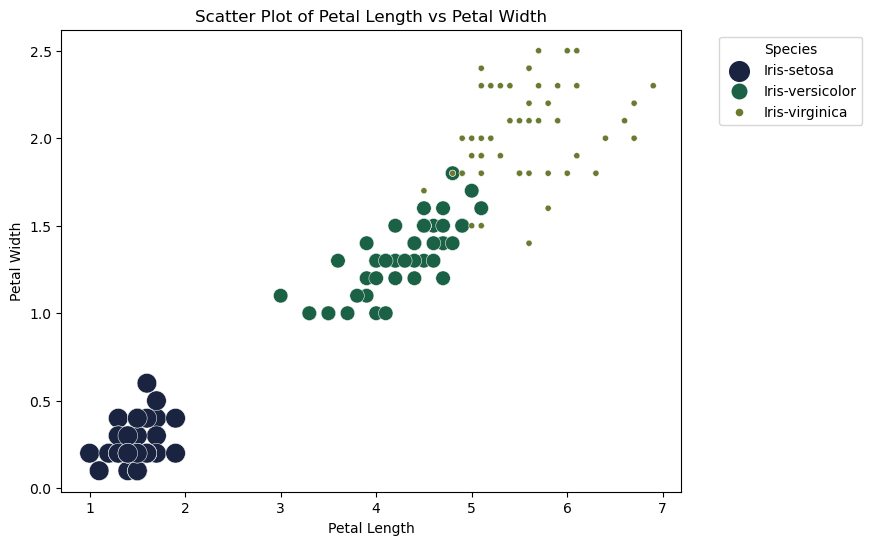

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.set_palette("cubehelix")
sns.scatterplot(x="petal_length", y="petal_width", hue="species", size="species", sizes=(20, 200), data=iris)
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.show()


C:\Users\prasanna\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

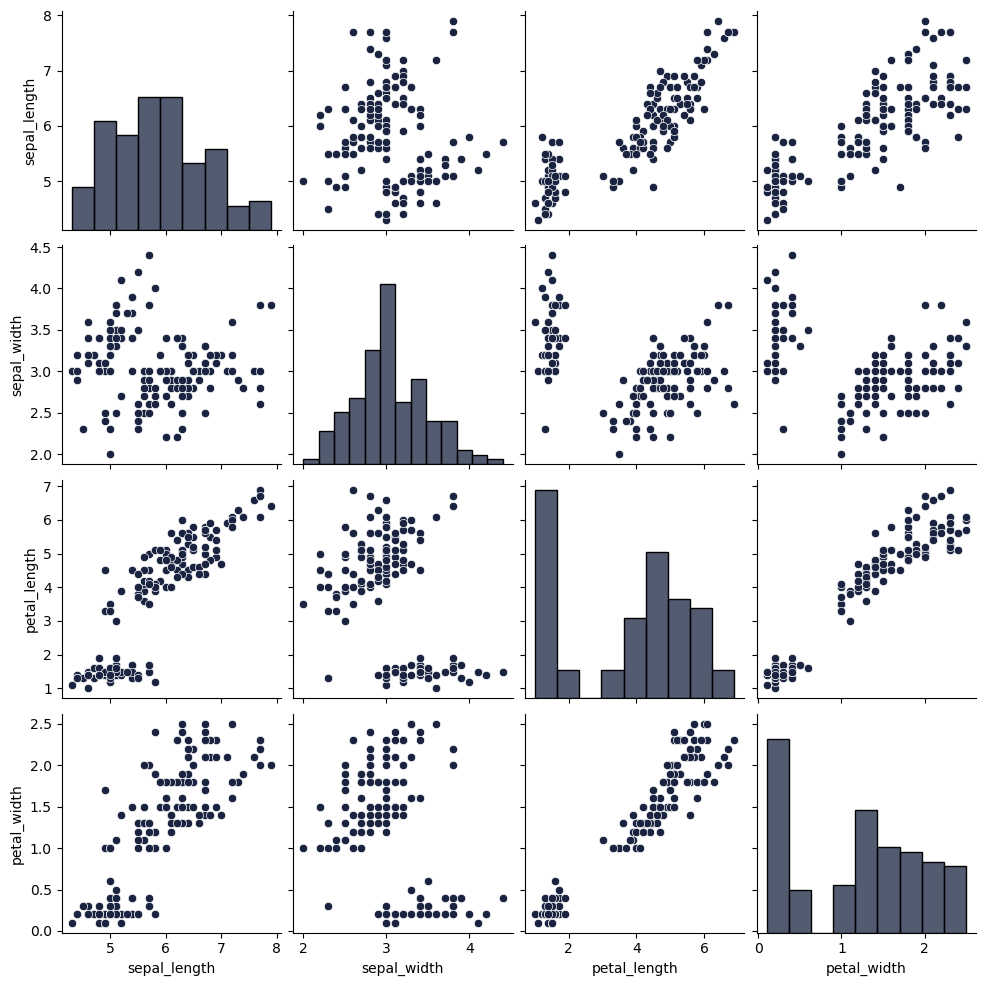

In [14]:
plt.figure(figsize=(10,5))
sns.pairplot(iris)
plt.show()

In [42]:
#Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
iris['species'] = lb_make.fit_transform(iris['species'])
iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
86,6.7,3.1,4.7,1.5,1
130,7.4,2.8,6.1,1.9,2
3,4.6,3.1,1.5,0.2,0


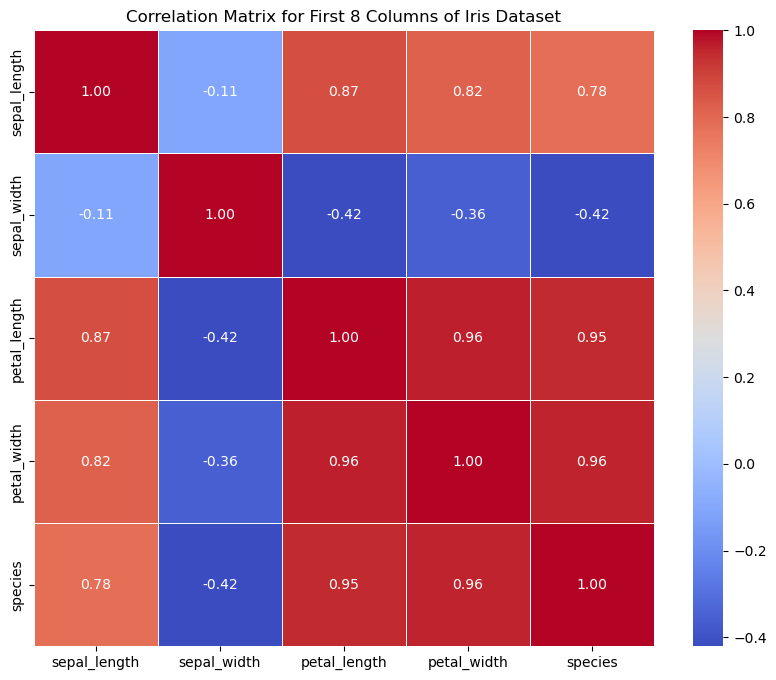

In [44]:
import seaborn as sns
import pandas as pd

# Select the first 8 columns of the iris dataset
subset_iris = iris.iloc[:, :6]

# Compute the correlation matrix
correlation_matrix = subset_iris.corr()

# Create a correlation matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for First 8 Columns of Iris Dataset')
plt.show()


### analysing and training data

In [30]:
#dependent and independent variable seperation
y = iris['species']
X = iris.drop(['species'], axis=1)

In [24]:
from sklearn.model_selection import KFold,train_test_split,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [26]:
model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)
# model = DecisionTreeClassifier()
model = model.fit(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], iris.species)


[[50  0  0]
 [ 0 49  1]
 [ 0  2 48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.98      0.97        50
           2       0.98      0.96      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



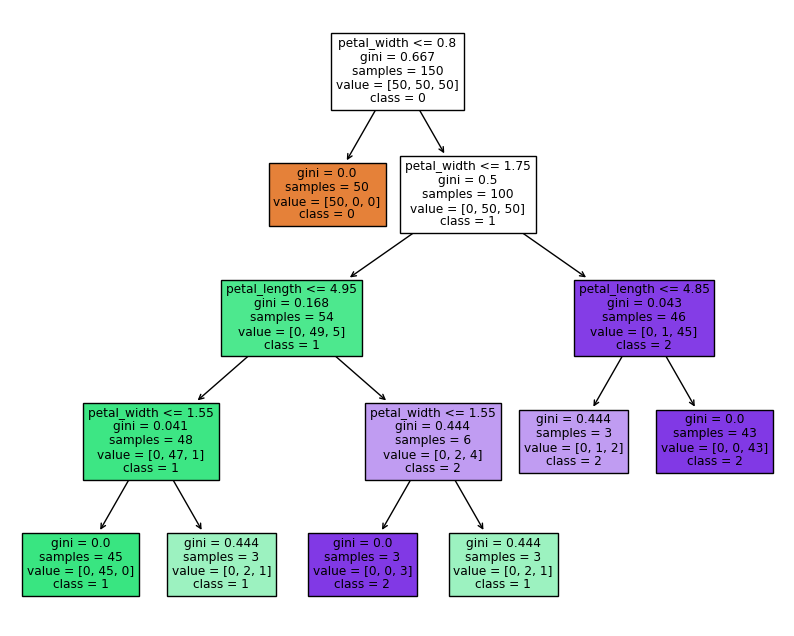

In [27]:
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in y.unique()]
plt.figure(figsize = (10,8))
plot_tree(model,feature_names = dt_feature_names, class_names = dt_target_names, filled = True)

y_pred = model.predict(X)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

In [29]:
print('accuracy is',accuracy_score(y,y_pred))

accuracy is 0.98
